In [1]:
import os
import h5py
import numpy as np 
# --- emanu ---
from emanu import util as UT

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def hadesBk(mnu): 
    fbk = os.path.join(UT.dat_dir(), 'bispectrum', 'hades.'+str(mnu)+'eV.nzbin4.mhmin3200.0.zspace.hdf5')
    bks = h5py.File(fbk, 'r')
    _bks = {}
    for k in bks.keys(): 
        _bks[k] = bks[k].value
    return _bks    
    
def quijoteBk(tt): 
    ''' Read in bispectrum for the quijote simulation 
    '''
    fbk = os.path.join(UT.dat_dir(), 'bispectrum', 'quijote_%s.hdf5' % tt)
    bks = h5py.File(fbk, 'r')
    _bks = {}
    for k in bks.keys(): 
        _bks[k] = bks[k].value
    return _bks

In [4]:
hades_Pks, hades_Bks = [], [] 
for mnu in [0.0, 0.06, 0.1, 0.15]: 
    bk_i = hadesBk(mnu)
    hades_Pks.append(np.average(bk_i['p0k1'], axis=0))
    hades_Bks.append(np.average(bk_i['b123'], axis=0))
    
quijote_Pks, quijote_Bks = [], [] 
for tt in ['fiducial', 'Mnu_p', 'Mnu_pp', 'Mnu_ppp']: 
    bk_i = quijoteBk(tt)
    quijote_Pks.append(np.average(bk_i['p0k1'], axis=0))
    quijote_Bks.append(np.average(bk_i['b123'], axis=0))

i_k, j_k, l_k = bk_i['k1'], bk_i['k2'], bk_i['k3']

In [5]:
kf = 2*np.pi/1000.

In [6]:
_, pklim = np.unique(i_k, return_index=True)

Text(0,0.5,'$P(k)/P^{\\rm fid}$')

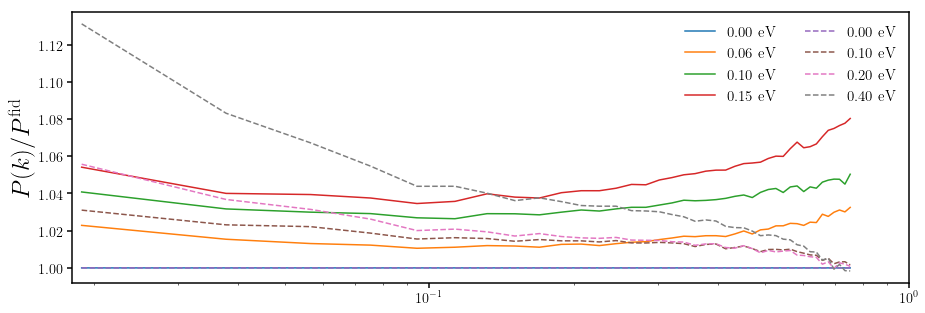

In [7]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for pk, mnu in zip(hades_Pks, [0.0, 0.06, 0.1, 0.15]):
    sub.plot(kf * i_k, pk/hades_Pks[0], label='%.2f eV' % mnu)
for pk, mnu in zip(quijote_Pks, [0.0, 0.1, 0.2, 0.4]):
    sub.plot(kf * i_k, pk/quijote_Pks[0], ls='--', label='%.2f eV' % mnu)
sub.legend(loc='upper right', ncol=2, fontsize=15)
sub.set_ylabel('$k$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel(r'$P(k)/P^{\rm fid}$', fontsize=25)

In [8]:
ijl = UT.ijl_order(i_k, j_k, l_k)

(0.9, 1.5)

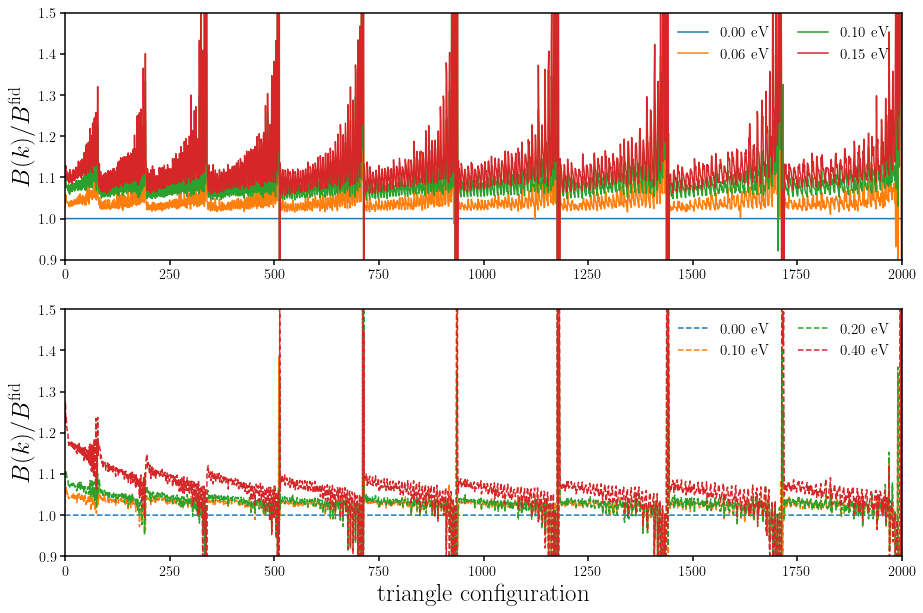

In [9]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(211)
for bk, mnu in zip(hades_Bks, [0.0, 0.06, 0.1, 0.15]):
    sub.plot(range(len(i_k)), bk[ijl]/hades_Bks[0][ijl], label='%.2f eV' % mnu)
sub.legend(loc='upper right', ncol=2, fontsize=15)
sub.set_xlim(0, 2000)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim([0.9, 1.5])
sub = fig.add_subplot(212)
for bk, mnu in zip(quijote_Bks, [0.0, 0.1, 0.2, 0.4]):
    sub.plot(range(len(i_k)), bk[ijl]/quijote_Bks[0][ijl], ls='--', label='%.2f eV' % mnu)
sub.legend(loc='upper right', ncol=2, fontsize=15)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0, 2000)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim([0.9, 1.5])

In [10]:
equ_bklim = (i_k == j_k) & (j_k == l_k)

(0.9, 1.5)

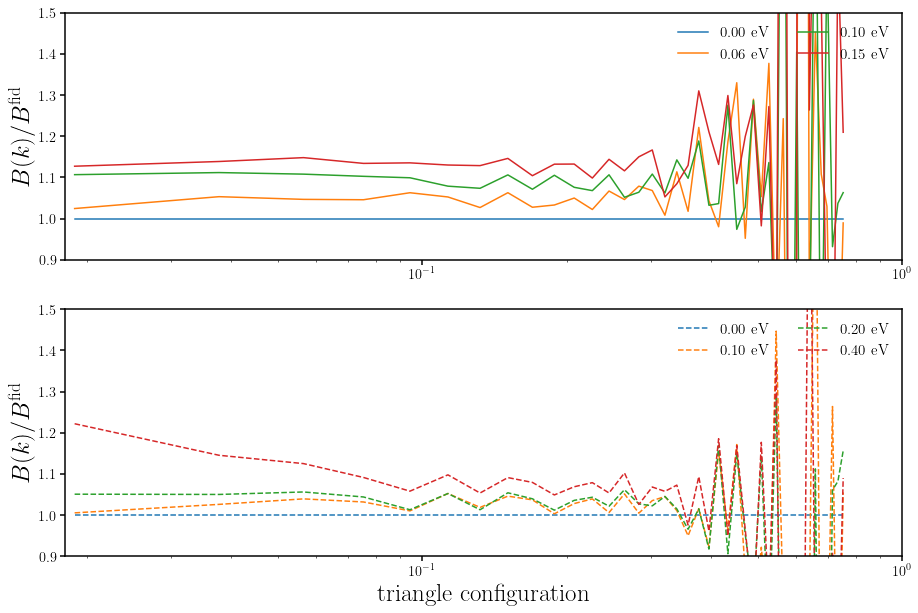

In [14]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(211)
for bk, mnu in zip(hades_Bks, [0.0, 0.06, 0.1, 0.15]):
    sub.plot(kf * i_k[equ_bklim], bk[equ_bklim]/hades_Bks[0][equ_bklim], label='%.2f eV' % mnu)
sub.legend(loc='upper right', ncol=2, fontsize=15)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim([0.9, 1.5])
sub = fig.add_subplot(212)
for bk, mnu in zip(quijote_Bks, [0.0, 0.1, 0.2, 0.4]):
    sub.plot(kf * i_k[equ_bklim], bk[equ_bklim]/quijote_Bks[0][equ_bklim], ls='--', label='%.2f eV' % mnu)
sub.legend(loc='upper right', ncol=2, fontsize=15)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim([0.9, 1.5])